In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [ ]:
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd0beee1a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd0bee7a160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd0beee1700>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd0bee7a820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd0bee7ab20>],
 'means': []}

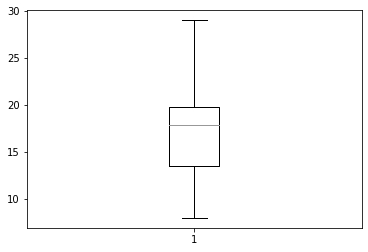

In [ ]:
plt.boxplot(data.dt)

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <a list of 5 Patch objects>)

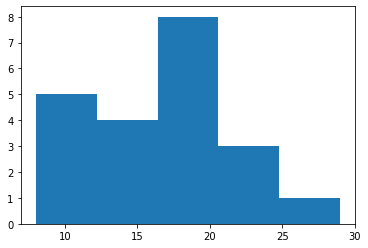

In [ ]:
plt.hist(data.dt,bins=5)

Text(0, 0.5, 'Delivery time')

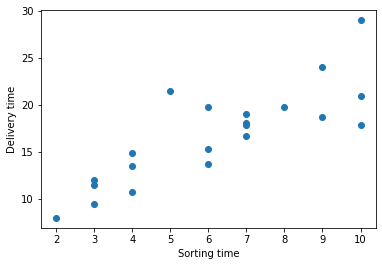

In [ ]:
plt.scatter(x=data.st,y=data.dt)
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


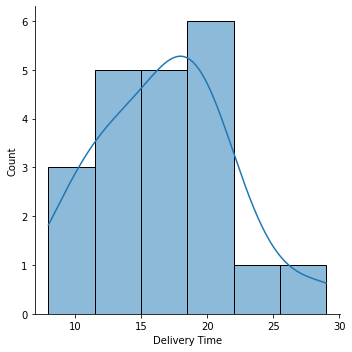

In [ ]:
sns.displot(data['Delivery Time'],kde=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


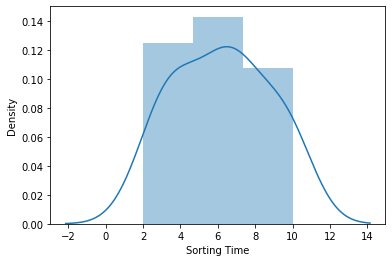

In [ ]:
sns.distplot(data['Sorting Time'],kde=True)

In [ ]:
import statsmodels.formula.api as smf


In [ ]:
data=data.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })

In [ ]:
model=smf.ols("dt~st",data=data).fit()

In [ ]:
model_1=smf.ols("dt~np.log(st)",data=data).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        11:26:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_2=smf.ols("dt~np.sqrt(st)",data=data).fit()

In [ ]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           2.61e-06
Time:                        11:27:53   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(st)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_4=smf.ols("dt~np.exp(st)",data=data).fit()

In [ ]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Sat, 28 Jan 2023   Prob (F-statistic):            0.00396
Time:                        11:28:34   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(st)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        11:26:52   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

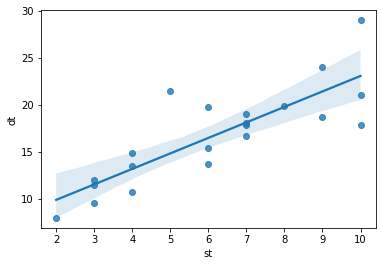

In [ ]:
sns.regplot(x="st",y="dt",data=data)

In [ ]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [ ]:
model_1.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [ ]:
model_2.params

Intercept     -2.518837
np.sqrt(st)    7.936591
dtype: float64

In [ ]:
model_1.tvalues

Intercept     0.472460
np.log(st)    6.586789
dtype: float64

In [ ]:
model.tvalues

Intercept    3.823349
st           6.387447
dtype: float64

In [ ]:
model_1.pvalues

Intercept     0.641980
np.log(st)    0.000003
dtype: float64

In [ ]:
model.pvalues

Intercept    0.001147
st           0.000004
dtype: float64

In [ ]:
model.rsquared

0.6822714748417231

In [ ]:
model_1.rsquared

0.6954434611324223

In [ ]:
model_4.rsquared

0.3611177022709089

In [ ]:
model.rsquared_adj

0.6655489208860244

In [ ]:
model_1.rsquared_adj

0.6794141696130761

In [ ]:
#predict new data points
newdata=pd.Series([200,300])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['st'])


In [ ]:
model.predict(data_pred)

0    336.386713
1    501.288703
dtype: float64

In [ ]:
model_1.predict(data_pred)

0    49.074558
1    52.741347
dtype: float64